In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import data
ages = ['UNDER5', 'AGE517', 'AGE1829', 'AGE3039', 'AGE5064', 'AGE6574', 'AGE75PLUS']
morris = 'figures_morris'
modified = 'figures_morris_mod'

data = []
for i in range(len(ages)):
    x = pd.read_csv('./results/' + ages[i] + '/' + morris + '/Morris.csv')
    data.append(x)
    
age = []
# Age 
for i in range(len(ages)):
    age.append(data[i][data[i].Feature == ages[i]])
    
vaccination = []
# Vaccination
for i in range(len(ages)):
    vaccination.append(data[i][data[i].Feature == 'VaccinationFull'])

In [13]:
# Function for formatter 
class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin=None, vmax=None):
        self.format = self.fformat
        if self._useMathText:
            self.format = r'$\mathdefault{%s}$' % self.format

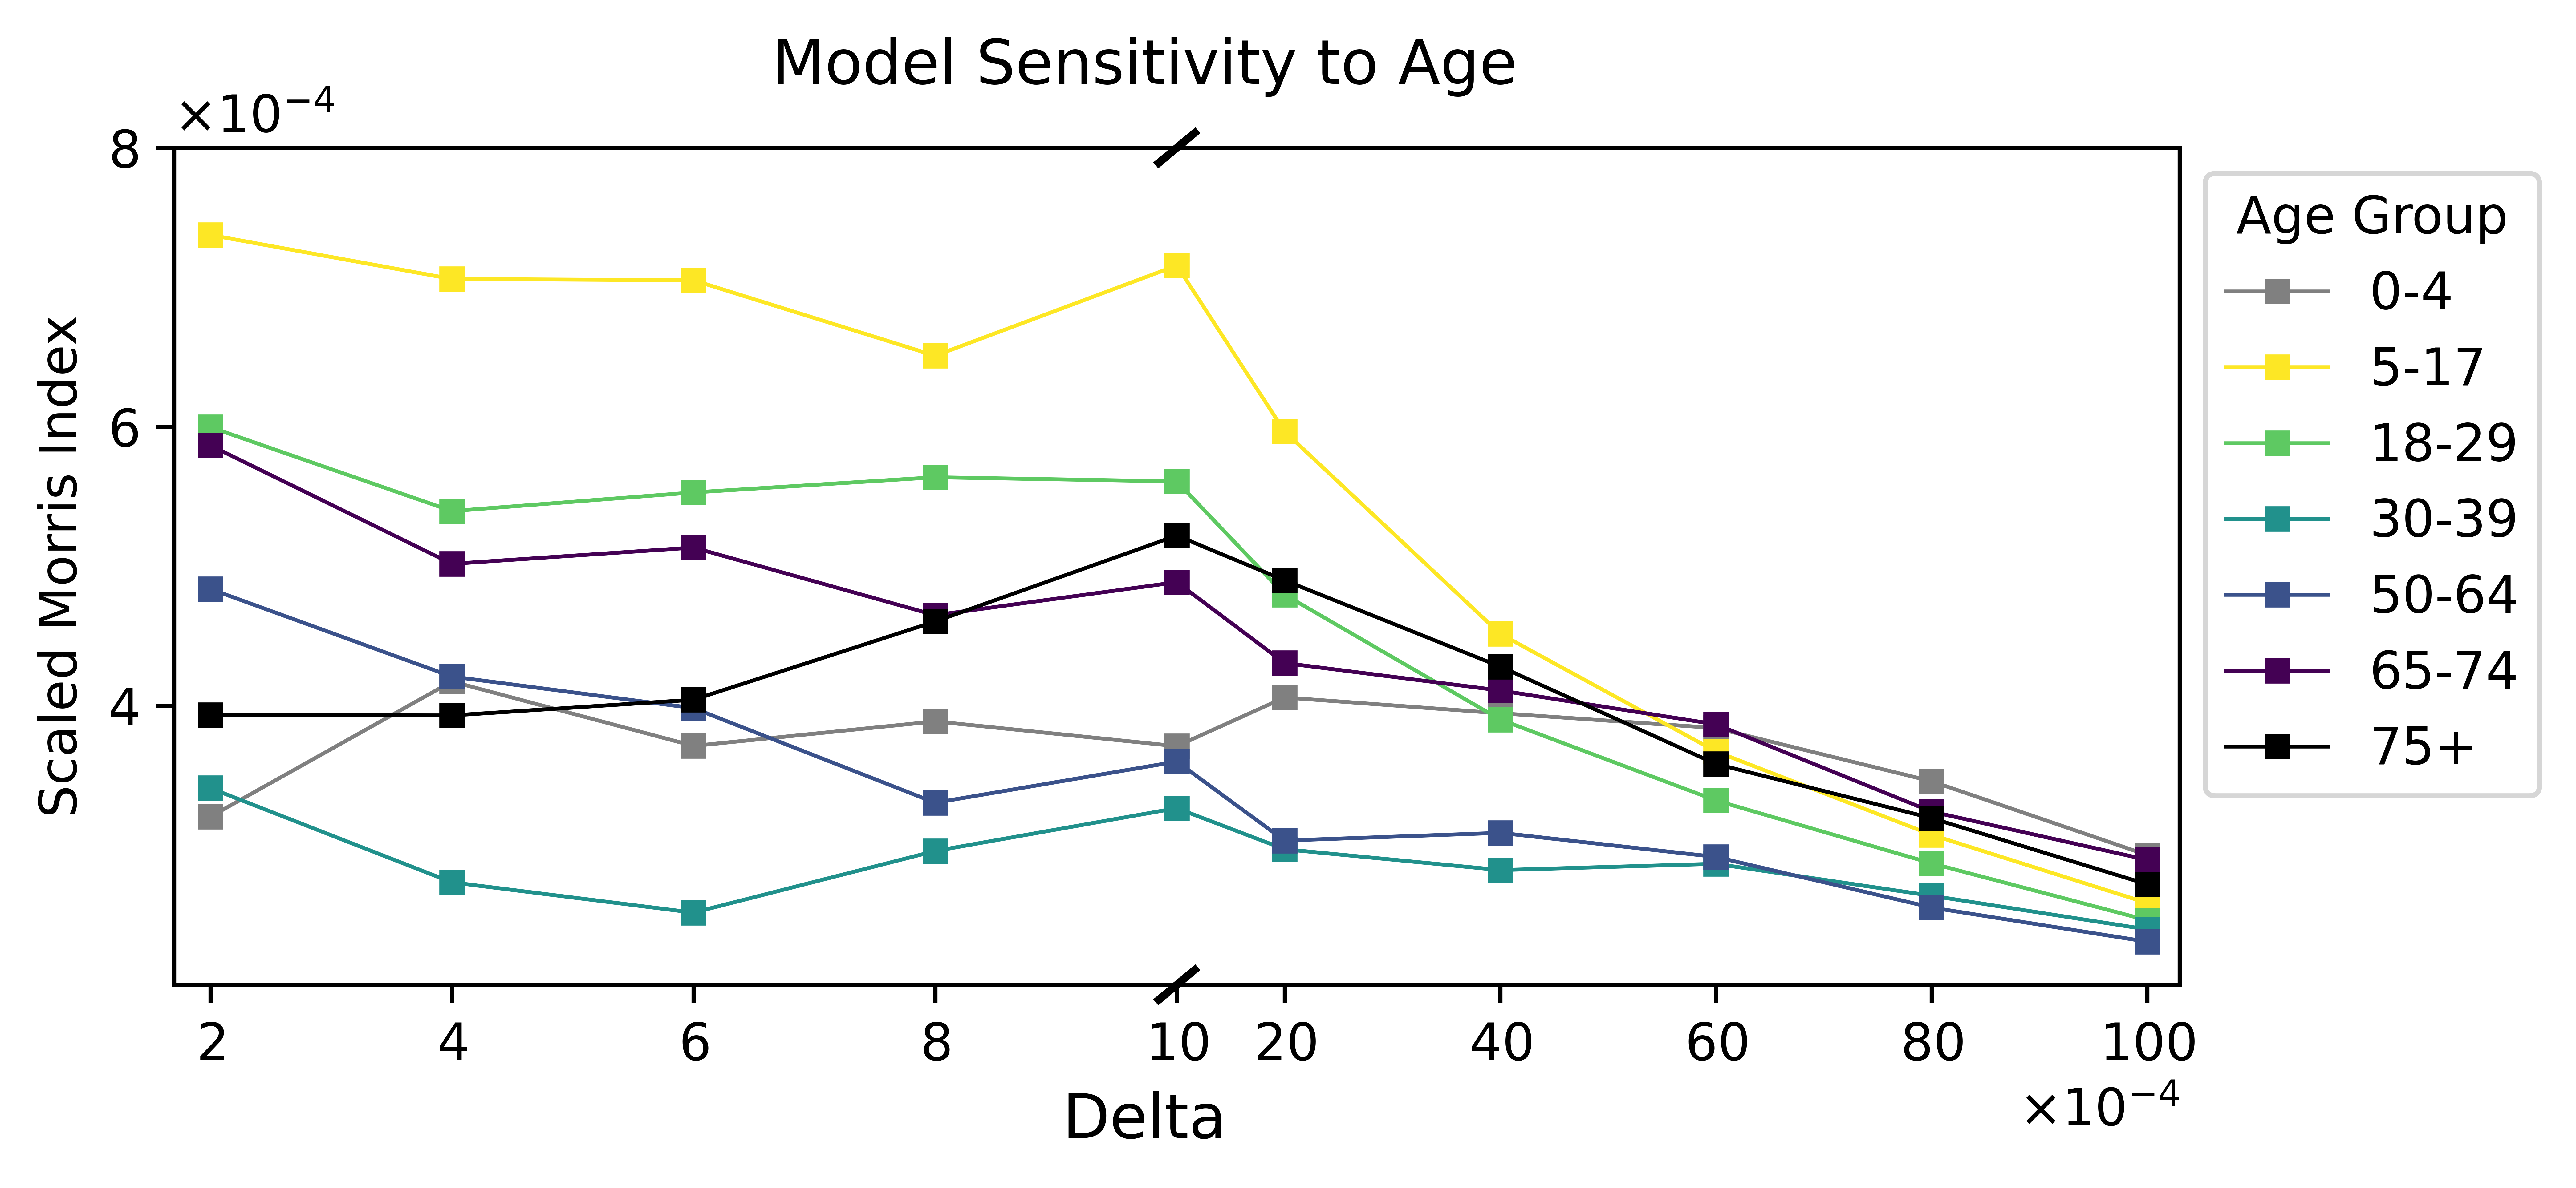

In [27]:
# Plot
import matplotlib
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 1200
fig, (ax, ax2) = plt.subplots(nrows=1, ncols=2, facecolor='w', sharey=True, figsize=(7, 3))
label = ['0-4', '5-17', '18-29', '30-39', '50-64', '65-74', '75+']
color = ['gray', '#fde725', '#5ec962', '#21918c', '#3b528b', '#440154', 'black']

# plot the same data on both axes
for i in range(len(ages)):
    ax.plot(age[i].Delta, age[i].Morris_sensitivity, 's-', markersize=4, linewidth=0.75, label=label[i], color=color[i])
    ax2.plot(age[i].Delta, age[i].Morris_sensitivity, 's-', markersize=4, linewidth=0.75, label=label[i], color=color[i])
        
# Scale axes
ax.yaxis.set_major_formatter(OOMFormatter(-4, "%1.0f"))
ax.ticklabel_format(axis='y', style='sci', scilimits=(-4,-4))   
ax.xaxis.set_major_formatter(OOMFormatter(-4, "%1.0f"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(-4,-4))
ax.xaxis.get_offset_text().set_visible(False)

ax2.yaxis.set_major_formatter(OOMFormatter(-4, "%1.0f"))
ax2.ticklabel_format(axis='y', style='sci', scilimits=(-4,-4))   
ax2.xaxis.set_major_formatter(OOMFormatter(-4, "%1.0f"))
ax2.ticklabel_format(axis='x', style='sci', scilimits=(-4,-4)) 
    
# Format plot
ax.set_xticks([0.0002, 0.0004, 0.0006, 0.0008, 0.001])
ax.set_yticks([0.0004, 0.0006, 0.0008])
ax.set_xlim(0.00017,0.001)
ax.set_ylim(0.0002,0.0008)
ax2.set_xticks([0.002, 0.004, 0.006, 0.008, 0.01])
ax2.set_xlim(0.001,0.0103)

# Split both plots by "/"
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.tick_params(labelleft='off')
ax2.tick_params(left = False)
d = .018 
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

# Add labels
ax.set_ylabel('Scaled Morris Index')
fig.suptitle('Model Sensitivity to Age')
fig.supxlabel('Delta', y=-0.025)
ax2.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', title='Age Group')
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('age.png', bbox_inches='tight')
plt.show()

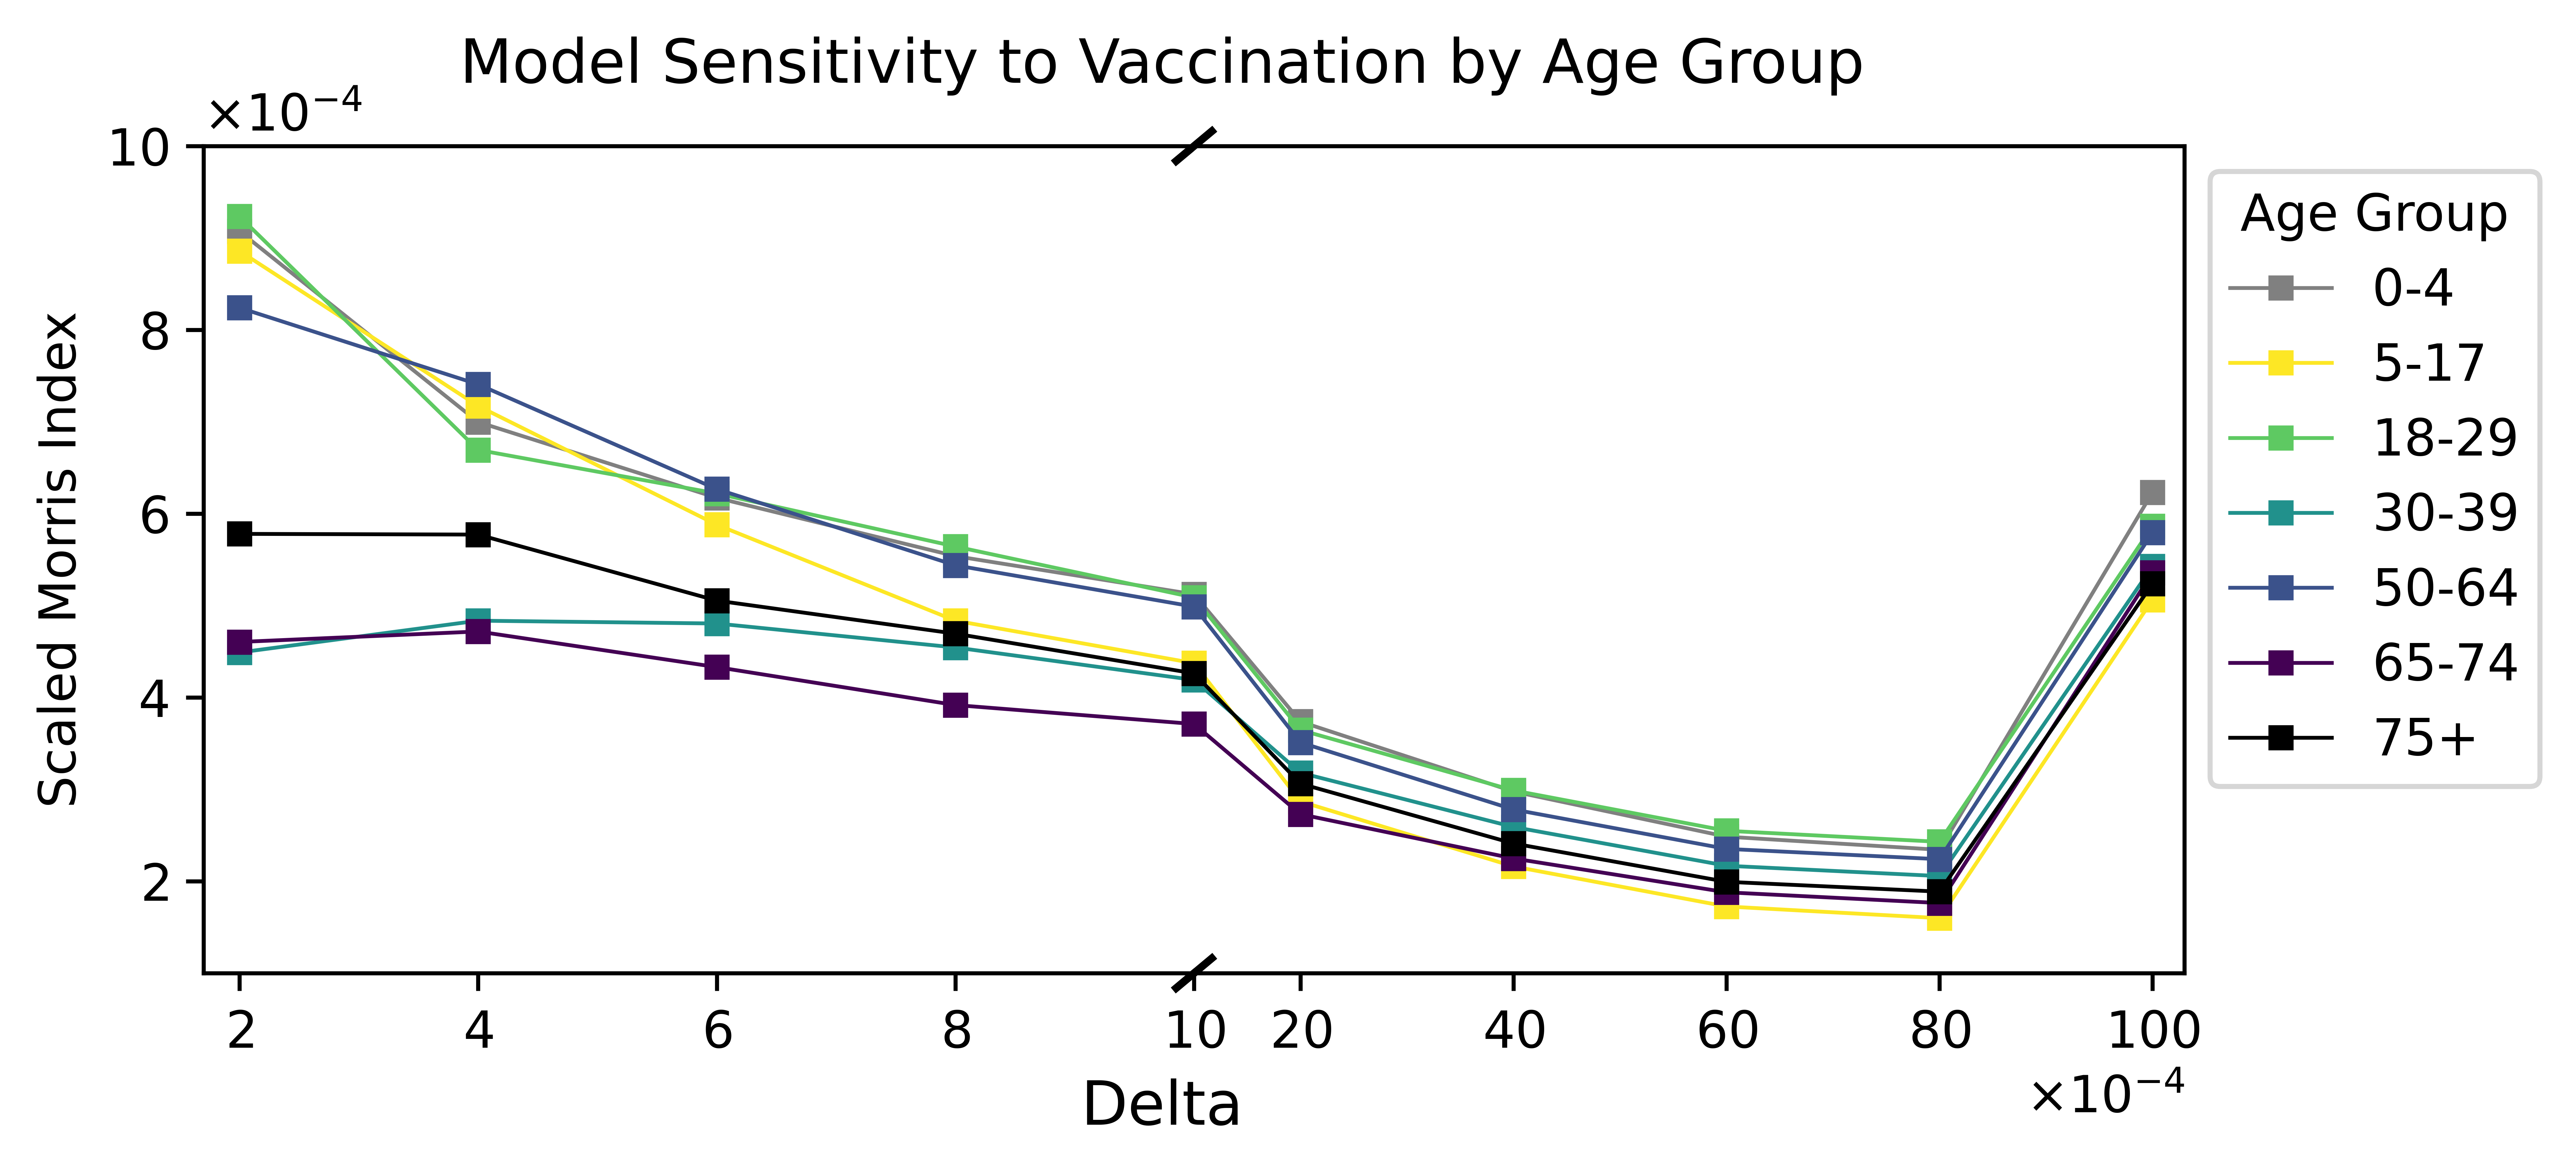

In [26]:
# Plot
import matplotlib
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 1200
fig, (ax, ax2) = plt.subplots(nrows=1, ncols=2, facecolor='w', sharey=True, figsize=(7, 3))
label = ['0-4', '5-17', '18-29', '30-39', '50-64', '65-74', '75+']
color = ['gray', '#fde725', '#5ec962', '#21918c', '#3b528b', '#440154', 'black']

# plot the same data on both axes
for i in range(len(ages)):
    ax.plot(vaccination[i].Delta, vaccination[i].Morris_sensitivity, 's-', markersize=4, linewidth=0.75, label=label[i], color=color[i])
    ax2.plot(vaccination[i].Delta, vaccination[i].Morris_sensitivity, 's-', markersize=4, linewidth=0.75, label=label[i], color=color[i])
        
# Scale axes
ax.yaxis.set_major_formatter(OOMFormatter(-4, "%1.0f"))
ax.ticklabel_format(axis='y', style='sci', scilimits=(-4,-4))   
ax.xaxis.set_major_formatter(OOMFormatter(-4, "%1.0f"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(-4,-4))
ax.xaxis.get_offset_text().set_visible(False)

ax2.yaxis.set_major_formatter(OOMFormatter(-4, "%1.0f"))
ax2.ticklabel_format(axis='y', style='sci', scilimits=(-4,-4))   
ax2.xaxis.set_major_formatter(OOMFormatter(-4, "%1.0f"))
ax2.ticklabel_format(axis='x', style='sci', scilimits=(-4,-4)) 
    
# Format plot
ax.set_xticks([0.0002, 0.0004, 0.0006, 0.0008, 0.001])
ax.set_yticks([0.0002, 0.0004, 0.0006, 0.0008, 0.001])
ax.set_xlim(0.00017,0.001)
ax.set_ylim(0.0001,0.001)
ax2.set_xticks([0.002, 0.004, 0.006, 0.008, 0.01])
ax2.set_xlim(0.001,0.0103)

# Split both plots by "/"
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.tick_params(labelleft='off')
ax2.tick_params(left = False)
d = .018 
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

# Add labels
ax.set_ylabel('Scaled Morris Index')
fig.suptitle('Model Sensitivity to Vaccination by Age Group')
fig.supxlabel('Delta', y=-0.025)
ax2.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', title='Age Group')
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('vaccination.png', bbox_inches='tight')
plt.show()